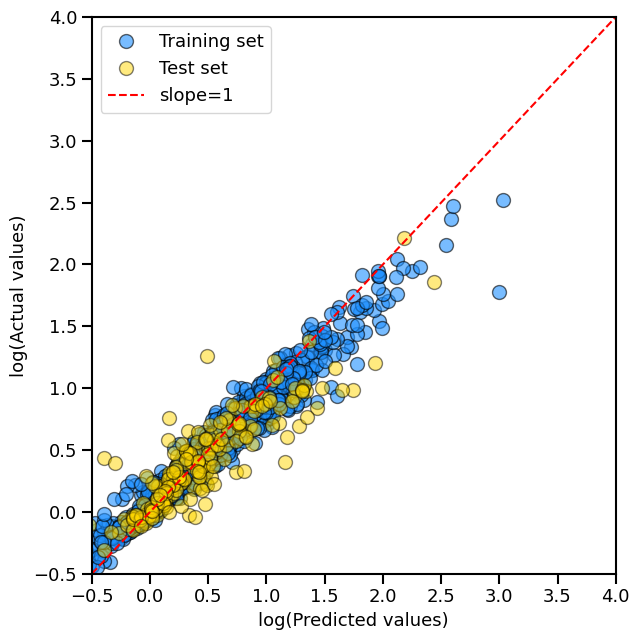

Training set score: 0.94
Test set score: 0.76
Pearson correlation coef, p-value: PearsonRResult(statistic=0.9792616530320423, pvalue=0.0)


In [2]:
## Load data ##
%matplotlib inline
import numpy as np
from numpy import array
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from scipy.stats import pearsonr
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import joblib

# Load data
df1 = pd.read_csv('feature.csv', sep=',')  # No changes needed here
df2 = pd.read_json('target.json')

# Replace NaN and infinity values with zero
dfX = df1.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
dfy = df2.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

# Model training
plt.figure(figsize=(6.5, 6.5))

X = dfX
y1 = dfy['kL'].values
y = np.log10(y1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

# Sample weighting (weight log(target) < 1 by factor of 5)
weights = np.array([5 if i < 1 else 1 for i in y_train])

## Train the RandomForestRegressor ##
RF = RandomForestRegressor(max_depth=13, n_estimators=100, max_features='sqrt', random_state=1)
RF.fit(X_train, y_train, sample_weight=weights)

# Save model using joblib
joblib.dump(RF, 'FinalKLModelWeighted.joblib')

# Predict
y_RF_predict1 = RF.predict(X_train)
y_RF_predict2 = RF.predict(X_test)

# Pearson correlation
Pearson = pearsonr(y_RF_predict1, y_train)

# Plot predicted values vs. actual target values
Xa = np.array(y_train)
ya = y_RF_predict1
plt.plot(Xa, ya, 'o', markersize=10, color='dodgerblue', mec='k', alpha=0.6, label='Training set')

Xb = np.array(y_test)
yb = y_RF_predict2
plt.plot(Xb, yb, 'o', markersize=10, color='gold', mec='k', alpha=0.5, label='Test set')

# Plot a line with slope=1
xx = np.linspace(-0.5, 4, 1000)
yy = xx
plt.plot(xx, yy, '--r', linewidth=1.5, label='slope=1')

plt.legend(loc='upper left', fontsize=13)
plt.xlabel('log(Predicted values)', fontsize=13)
plt.ylabel('log(Actual values)', fontsize=13)
plt.xlim(-0.5, 4)
plt.ylim(-0.5, 4)
ax = plt.gca()
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)
ax.spines['top'].set_linewidth(1.5)
plt.tick_params(axis='both', width=1.5, length=7, labelsize=13)
plt.tight_layout()
plt.savefig("FinalKLModelWeighted.png")
plt.show()

# Output the scores and Pearson correlation
print("Training set score: {:.2f}".format(RF.score(X_train, y_train, sample_weight=weights)))
print("Test set score: {:.2f}".format(RF.score(X_test, y_test)))
print("Pearson correlation coef, p-value:", Pearson)